In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.decomposition import NMF
from scipy import sparse
import sys
#sys.path.insert(1, 'C:/Users/jola1/Desktop/Skole/bacholar_projekt/Toxisity-detection-matrix-factorization/sklearn/decomposition')
#import nmf

In [4]:
toxicity_annotated_comments = pd.read_csv("./wiki_data/toxicity_annotated_comments.tsv", delimiter="\t")
toxicity_annotated_comments.set_index("rev_id", inplace=True)
toxicity_annotations = pd.read_csv("./wiki_data/toxicity_annotations.tsv", delimiter="\t")
toxicity_annotations["id"] = toxicity_annotations["worker_id"].astype(str) + '_' + toxicity_annotations["rev_id"].astype(str)
toxicity_annotations.set_index("id", inplace=True)
toxicity_worker_demographics = pd.read_csv("./wiki_data/toxicity_worker_demographics.tsv", delimiter="\t")
toxicity_worker_demographics.set_index("worker_id", inplace=True)

rev_id
2232.0     0.1
4216.0     0.0
8953.0     0.0
26547.0    0.0
28959.0    0.2
35367.0    0.1
37330.0    0.3
37346.0    0.1
37675.0    0.2
44377.0    0.0
Name: toxicity, dtype: float64
rev_id
2232.0     0.100000
4216.0     0.000000
8953.0     0.000000
26547.0    0.000000
28959.0    0.177778
35367.0    0.100000
37330.0    0.233333
37346.0    0.100000
37675.0    0.177778
44377.0    0.000000
Name: toxicity, dtype: float64


<BarContainer object of 159686 artists>

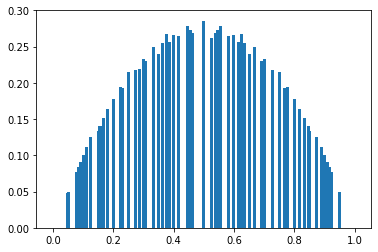

In [22]:
print(toxicity_annotations.groupby(['rev_id']).mean()["toxicity"])

print(toxicity_annotations.iloc[:100].groupby(['rev_id']).var()["toxicity"])

plt.bar(list(toxicity_annotations.groupby(['rev_id']).mean()["toxicity"]), toxicity_annotations.groupby(['rev_id']).var()["toxicity"], width =0.01)

(array([9.0564e+04, 4.9900e+02, 2.7079e+04, 2.0200e+02, 1.1745e+04,
        6.5680e+03, 1.0200e+02, 1.0600e+02, 4.3700e+03, 5.4000e+01,
        3.0780e+03, 2.6760e+03, 4.9000e+01, 2.4980e+03, 3.0000e+01,
        5.9000e+01, 2.4070e+03, 7.2000e+01, 3.0570e+03, 4.4710e+03]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

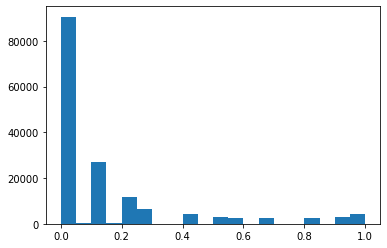

In [7]:
plt.hist(list(toxicity_annotations.groupby(['rev_id']).mean()["toxicity"]), bins=20)

In [4]:
toxicity_annotations['worker_id'].value_counts()

43      489
98      489
67      488
274     487
85      487
       ... 
3681      7
4076      7
4196      7
2472      6
4300      5
Name: worker_id, Length: 4301, dtype: int64

In [5]:
best_workers = toxicity_annotations['worker_id'].value_counts().index[:6]

<BarContainer object of 4301 artists>

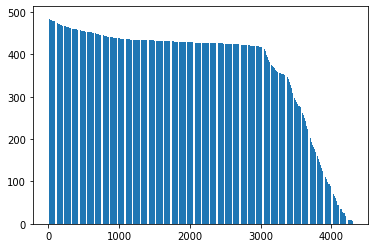

In [6]:
plt.bar(list(range(len(toxicity_annotations['worker_id'].value_counts()))), toxicity_annotations['worker_id'].value_counts())

In [7]:
toxicity_worker_demographics.loc[best_workers]

C:\Users\jola1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,gender,english_first_language,age_group,education
43,male,0.0,18-30,bachelors
98,female,0.0,30-45,hs
67,male,0.0,30-45,professional
274,male,0.0,30-45,masters
85,female,0.0,18-30,bachelors
22,NaN,NaN,NaN,NaN


In [8]:
toxicity_annotations["id"] = toxicity_annotations.index
toxicity_annotations.set_index("worker_id", inplace=True)
visable_data_sparse = toxicity_annotations.loc[best_workers]
#visable_data_sparse = toxicity_annotations.where(toxicity_annotations["worker_id"] < 100)

visable_data_sparse["worker_id"] = visable_data_sparse.index
visable_data_sparse.set_index("id", inplace=True)

print(visable_data_sparse)

uniqe_worker_ids = list(set(visable_data_sparse["worker_id"]))
uniqe_rev_ids = list(set(visable_data_sparse["rev_id"]))

worker_to_id = dict(zip(uniqe_worker_ids, list(range(len(uniqe_worker_ids)))))
rev_to_id = dict(zip(uniqe_rev_ids, list(range(len(uniqe_rev_ids)))))

# toxicity_annotations["worker_id"] = toxicity_annotations.index
# toxicity_annotations.set_index("rev_id", inplace=True)

# toxicity_annotations["rev_id"] = toxicity_annotations.index
# toxicity_annotations.set_index("id", inplace=True)

# visable_data_sparse = toxicity_annotations.iloc[:1000]

# print(visable_data_sparse)


# # for debugging
# visable_data_sparse["rev_id_id"] = range(1000)
# set(visable_data_sparse["worker_id"])

                     rev_id  toxicity  toxicity_score  worker_id
id                                                              
43_1557225.0      1557225.0         0             0.0         43
43_4282271.0      4282271.0         0             1.0         43
43_5098437.0      5098437.0         0             1.0         43
43_7209342.0      7209342.0         0             1.0         43
43_8239774.0      8239774.0         0             1.0         43
...                     ...       ...             ...        ...
22_690855980.0  690855980.0         0             1.0         22
22_690869647.0  690869647.0         0             1.0         22
22_690966840.0  690966840.0         0             1.0         22
22_692716244.0  692716244.0         0             1.0         22
22_694418412.0  694418412.0         0             1.0         22

[2927 rows x 4 columns]


In [9]:
##visable_values = np.empty(visable_data_sparse.shape[0] * len(best_workers)).reshape(len(best_workers),visable_data_sparse.shape[0])
visable_values = np.empty((len(best_workers),visable_data_sparse.shape[0]))
#visable_values = np.empty((3,3,))
visable_values[:] = 0

print(visable_values)

for i, row in visable_data_sparse.iterrows():
    visable_values[worker_to_id[row["worker_id"]]][rev_to_id[row["rev_id"]]] = row["toxicity"] + 1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
print(len(visable_values))
print(len(visable_values[0]))

6
2927


In [11]:
X = sparse.csr_matrix(visable_values)
model = NMF(n_components=6, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [12]:
model.reconstruction_err_

7.205134112367288e-05

In [13]:
visable_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
import nimfa

In [18]:
visable_values = np.empty((len(best_workers),visable_data_sparse.shape[0]))
#visable_values = np.empty((3,3,))
visable_values[:] = np.nan

for i, row in visable_data_sparse.iterrows():
    visable_values[worker_to_id[row["worker_id"]]][rev_to_id[row["rev_id"]]] = row["toxicity"]
    
print(visable_values)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 0. nan nan ... nan nan nan]
 [nan  0. nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [19]:
V = sparse.csr_matrix(visable_values)
bmf = nimfa.Bmf(V, seed="nndsvd", rank=10, max_iter=12, lambda_w=1.1, lambda_h=1.1)
bmf_fit = bmf()

AttributeError: module 'scipy.sparse.linalg' has no attribute 'eigen_symmetric'

In [15]:
np.random.rand(40, 100)

array([[0.81804051, 0.76869578, 0.68875646, ..., 0.91334094, 0.8089278 ,
        0.00781593],
       [0.05942377, 0.89552475, 0.87501227, ..., 0.1791261 , 0.97661043,
        0.23518553],
       [0.16990945, 0.95718936, 0.86553377, ..., 0.62295022, 0.13252902,
        0.5416333 ],
       ...,
       [0.42190142, 0.01573313, 0.96607982, ..., 0.69788769, 0.63915154,
        0.21835244],
       [0.52602211, 0.06342711, 0.97059187, ..., 0.40855711, 0.82503579,
        0.17633631],
       [0.5456392 , 0.02527109, 0.56249297, ..., 0.72155602, 0.43179144,
        0.91568348]])

In [1]:
import numpy

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter'''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)

        e = 0

        for i in range(len(R)):

            for j in range(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)

                    for k in range(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: local minimum
        if e < 0.001:

            break

    return P, Q.T

In [2]:
R = [

     [5,3,0,1],

     [4,0,0,1],

     [1,1,0,5],

     [1,0,0,4],

     [0,1,5,4],
    
     [2,1,3,0],

    ]

R = numpy.array(R)
# N: num of User
N = len(R)
# M: num of Movie
M = len(R[0])
# Num of Features
K = 3

 
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

 

nP, nQ = matrix_factorization(R, P, Q, K)

nR = numpy.dot(nP, nQ.T)